In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [443]:
data = pd.read_csv("steamdata_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25306 entries, 0 to 25305
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                25306 non-null  object 
 1   steam_appid         25306 non-null  int64  
 2   controller_support  25306 non-null  int64  
 3   dlc                 25306 non-null  int64  
 4   short_description   25292 non-null  object 
 5   demos               25306 non-null  int64  
 6   platforms           25306 non-null  object 
 7   movies              25306 non-null  int64  
 8   achievements        25306 non-null  int64  
 9   release_date        25306 non-null  object 
 10  genres              25306 non-null  object 
 11  categories          25306 non-null  object 
 12  developer           25306 non-null  object 
 13  publisher           25306 non-null  object 
 14  owners              25306 non-null  object 
 15  average_forever     25306 non-null  int64  
 16  medi

In [444]:
# fill null with blank descriptions
data["short_description"] = data["short_description"].fillna("")

<AxesSubplot:xlabel='tags_count', ylabel='tags'>

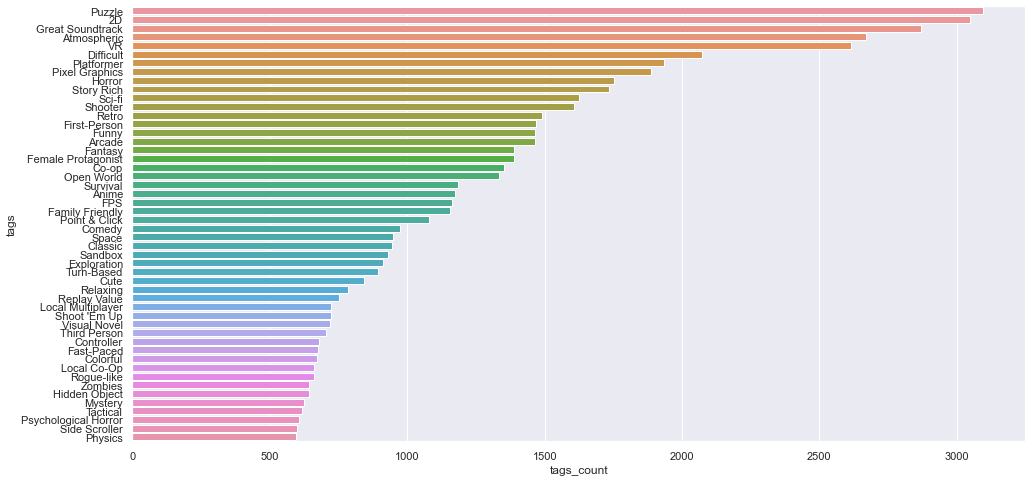

In [445]:
tags_count = pd.DataFrame(data.additional_tags.str.split(';').explode().value_counts()).reset_index()
tags_count.columns = ["tags", "tags_count"]
tags_count = tags_count[(tags_count["tags"] != "Singleplayer") & (tags_count["tags"] != "Multiplayer") & (tags_count["tags"] != "NSFW")]
f = plt.figure(figsize=(16, 8))
sb.barplot(x = "tags_count", y = "tags", data = tags_count.head(50))

In [446]:
data[["name", "developer", "genres", "initialprice", "rating"]].sort_values("rating", ascending = False).head(20)

,name,developer,genres,initialprice,rating
23,Portal 2,Valve,Action;Adventure,9.99,98.6
7312,Factorio,Wube Software LTD.,Casual;Indie;Simulation;Strategy;Early Access,30.00,98.4
2255,One Finger Death Punch,Silver Dollar Games,Action;Casual;Indie,4.99,98.0
7248,Iron Snout,SnoutUp,Action;Free to Play;Indie,0.00,97.8
17,Portal,Valve,Action,9.99,97.8
6885,TY the Tasmanian Tiger,Krome Studios,Action;Adventure;Indie,14.99,97.8
4236,Finding Paradise,Freebird Games,Adventure;Indie;RPG,9.99,97.8
7144,OneShot,Little Cat Feet,Adventure;Casual;Indie,9.99,97.8
2980,RimWorld,Ludeon Studios,Indie;Simulation;Strategy,34.99,97.7
2014,A Hat in Time,Gears for Breakfast,Adventure;Indie,29.99,97.7


Taking a look at the top games, Action, Adventure, Indie seem to be common genres of top games

In [447]:
# we will only look at 'main' genres of games, since some titles on steam w/ genres eg. Photo Editing arent really games
genre_cols = ["Action",
            "Adventure",
            "Casual",
            "Indie",
            "Massively Multiplayer",
            "RPG",
            "Racing",
            "Simulation",
            "Sports",
            "Strategy"]

In [448]:
genre_encoding = data["genres"].str.get_dummies(';').filter(genre_cols)
genre_encoding

,Action,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25301,0,1,1,1,0,0,0,0,0,0
25302,1,1,0,1,0,0,0,0,0,0
25303,1,0,1,1,0,0,0,0,0,0
25304,0,1,1,1,0,0,0,0,0,0


<AxesSubplot:>

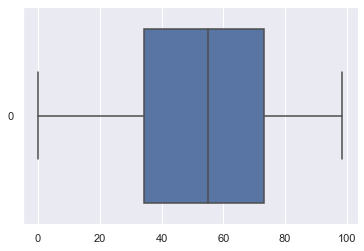

In [449]:
sb.boxplot(data = data["rating"], orient = "h")

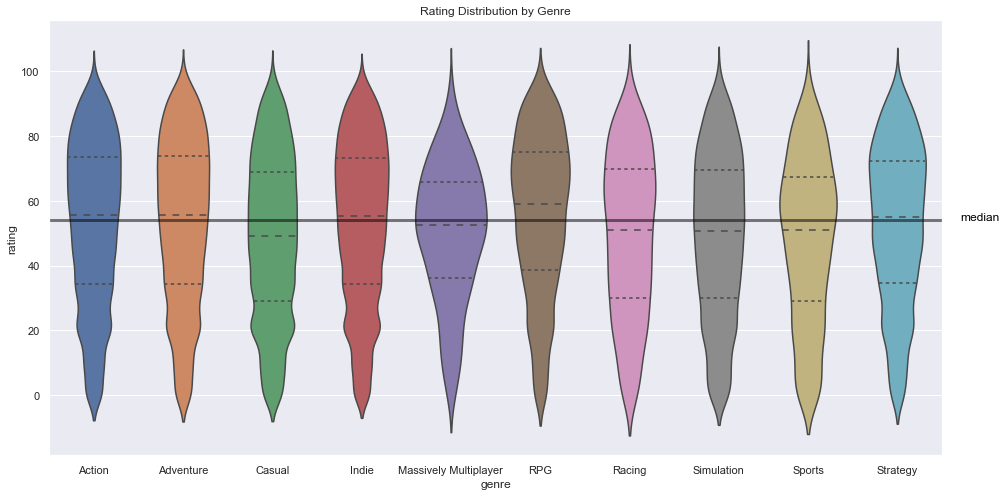

In [450]:
genres_df = data[["rating", "initialprice"]]
genres_df = pd.concat([genres_df, genre_encoding], axis = "columns")

genres_data = pd.DataFrame()
# create new dataframe with each entry of genre to respective rating, as games can belong to multiple genres
for col in genre_cols:
    ratings = pd.DataFrame(genres_df.loc[genres_df[col] == 1, "rating"].values, columns = ["rating"])
    ratings["genre"] = col
    genres_data = pd.concat([genres_data, ratings], axis = 0)

fig, ax = plt.subplots(figsize=(16, 8))
sb.violinplot(x = "genre", y = "rating", data = genres_data, inner = "quartile", ax = ax)
ax.set_title("Rating Distribution by Genre")
ax.axhline(genres_data.rating.median(), color = "black", lw = 3, alpha = 0.5)
ax.text(9.7, genres_data.rating.median(), "median", color = 'black')
plt.show()

Not much variations in rating across genres, maybe because of how games can and often have multiple genres. eg. Action games usually come together with Adventure

- Massively Multiplayer games are mostly distributed around its median and tend to have much lower ratings than other genres 
- Racing, Simulation, Sports games have slightly lower ratings than most genres
- RPG games have much higher ratings than other genres
- Casual games have much lower ratings than other genres

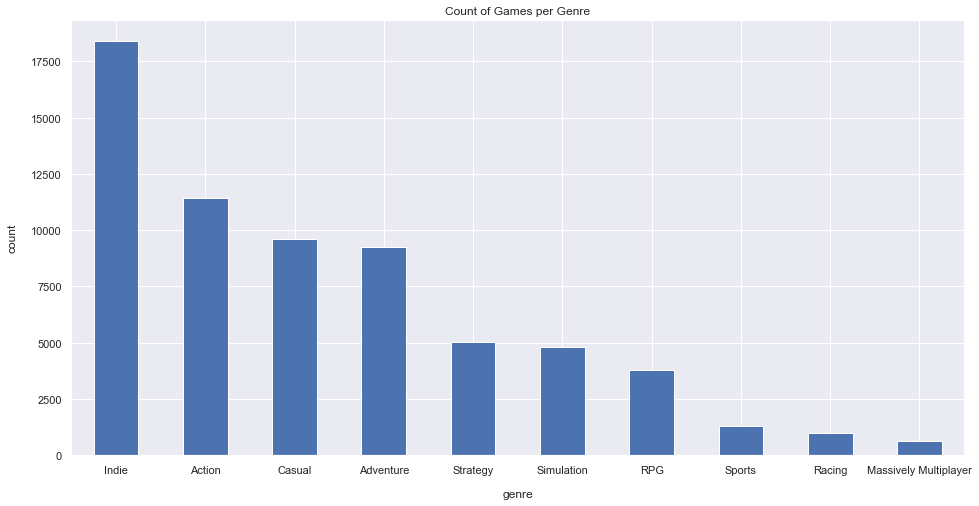

In [451]:
f = plt.figure(figsize=(16, 8))
genres_data["genre"].value_counts().plot(kind = "bar", rot = 0);
plt.xlabel("genre", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Count of Games per Genre");

- Massively Multiplayer games are fewest
- Very few Sports and Racing games
- A lot of Indie games aka games by non-AAA developers, meaning smaller development studios or solo-devs 

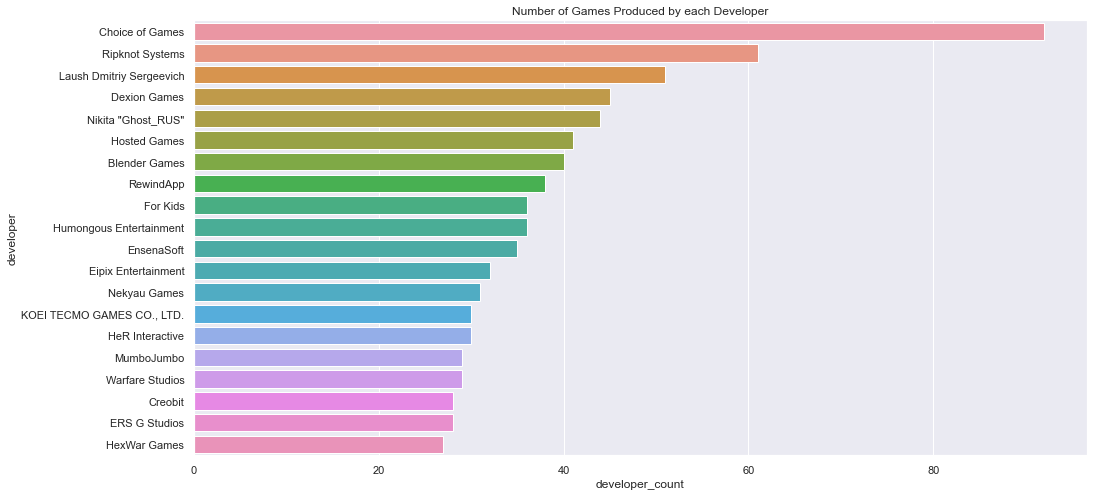

In [452]:
developer_count = pd.DataFrame(data.developer.str.split(';').explode().value_counts()).reset_index()
developer_count.columns = ["developer", "developer_count"]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "developer_count", y = "developer", data = developer_count.head(20))
plt.title("Number of Games Produced by each Developer");

In [453]:
# get top developers by scoring using Bayesian Average: S = wR + (1-w)C
# S = score of dev
# R = average of game ratings for the dev
# C = average of game ratings for all devs
# W = weight assigned to R and computed as v/(v+m), 
# where v = number of game ratings for that dev, m = average number of game ratings for all devs

ratings = developer_df.groupby(["developer"])["rating"].apply(list)
ratings = pd.DataFrame(ratings)
ratings = ratings.merge(developer_count, on = "developer")

ratings["R"] = ratings["rating"].apply(lambda x: sum(x)/len(x))
C = ratings["rating"].apply(lambda x: sum(x)).sum() / ratings["developer_count"].sum()
M = ratings["developer_count"].sum() / ratings.shape[0]
ratings["W"] = ratings["developer_count"] / (ratings["developer_count"]+M)
ratings["S"] = ratings["W"]*ratings["R"] + (1 - ratings["W"])*C

developer_data = ratings[["developer", "S"]]
developer_data = developer_data.rename(columns = {"S":"score"})

developer_data.sort_values(by = "score", ascending = False).head(20)

,developer,score
14407,Valve,86.207864
31,07th Expansion,85.907255
9357,Nihon Falcom,85.448760
9322,Nickervision Studios,85.290804
3004,Croteam,85.102795
11185,Relic Entertainment,85.039735
14719,Wadjet Eye Games,84.474831
11837,Scott Cawthon,84.140072
1080,Artifex Mundi,82.322183
11558,Rusty Lake,82.118229


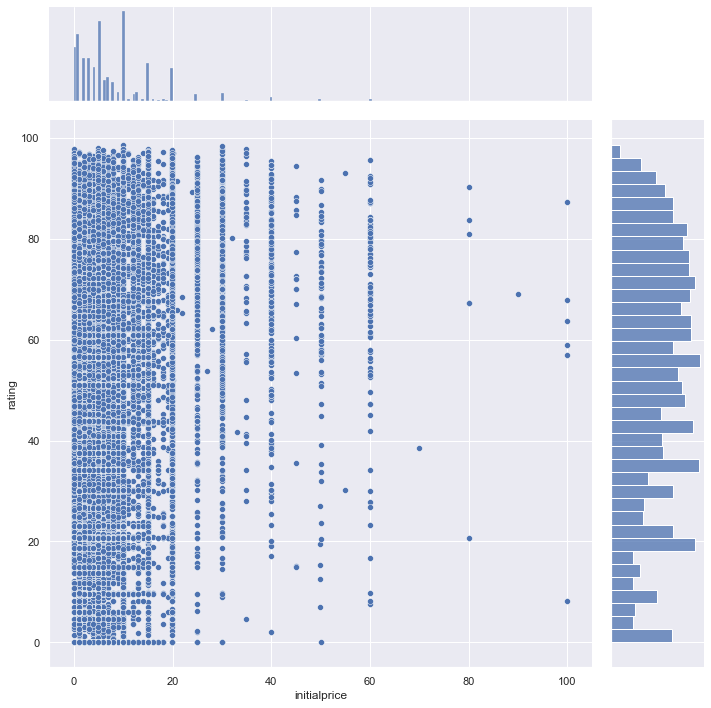

In [454]:
# remove extreme outliers distorting the scale
price_df = pd.concat([data[data["initialprice"] < 199]["initialprice"], data["rating"]], axis = 1)
sb.jointplot(data = price_df, x = "initialprice", y = "rating", height = 10)

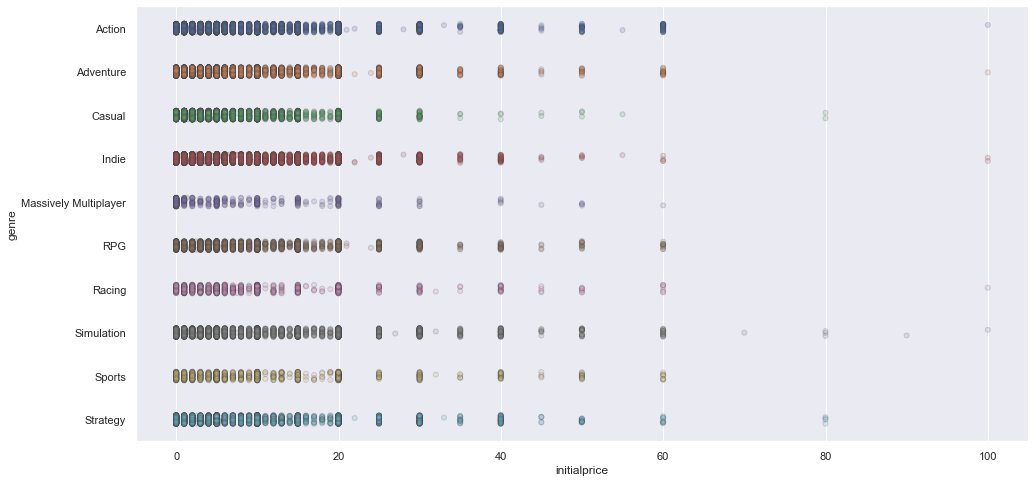

In [455]:
prices_data = pd.DataFrame()

for col in genre_cols:
    prices = pd.DataFrame(genres_df.loc[genres_df[col] == 1, "initialprice"].values, columns = ["initialprice"])
    prices["genre"] = col
    prices_data = pd.concat([prices_data, prices], axis = 0)
    
# remove extreme outliers distorting the scale
prices_data = prices_data[prices_data["initialprice"] < 100]
f = plt.figure(figsize=(16, 8))
ax = sb.stripplot(x="initialprice", y="genre", data=prices_data, jitter=True, alpha=0.2, linewidth=1);

most games are priced below 20 dollars, almost all games are priced at 60 dollars or less

In [469]:
var = data[["controller_support", "dlc", "demos", "movies", "achievements", "is_multiplayer", "rating"]].copy()

In [470]:
# platforms -> no. of platforms supported, languages -> no. of languages supported
var["platforms"] = data["platforms"].apply(lambda x: len(x.split(';')))
var["languages"] = data["languages"].apply(lambda x: len(x.split(';')))

<AxesSubplot:>

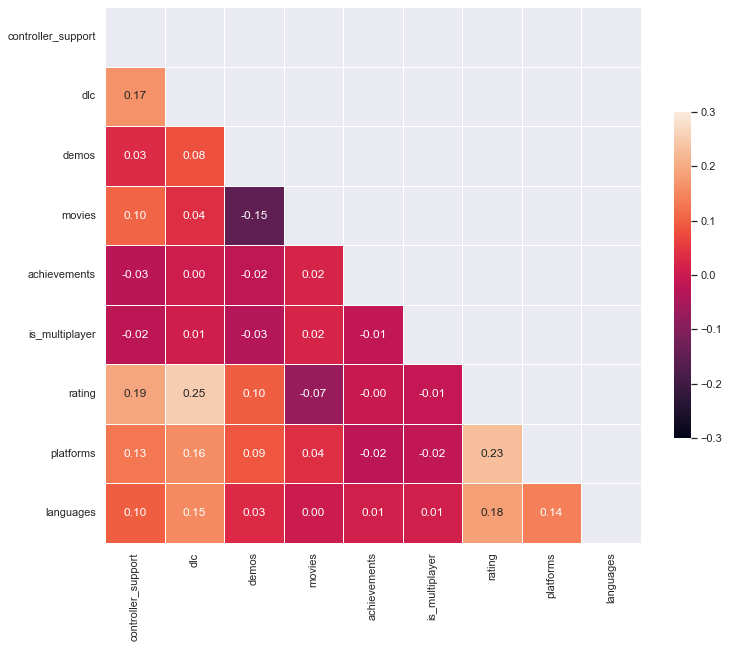

In [471]:
# Compute the correlation matrix
var_corr = var.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(var_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(var_corr, mask=mask, cmap="rocket", vmin = -0.3, vmax = 0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt = ".2f")

controller support, DLC, demos, price, no. of languages, no. of platforms seem to be correlated with rating. surprisingly, whether a game is multiplayer or has achievements does not really affect rating

<AxesSubplot:>

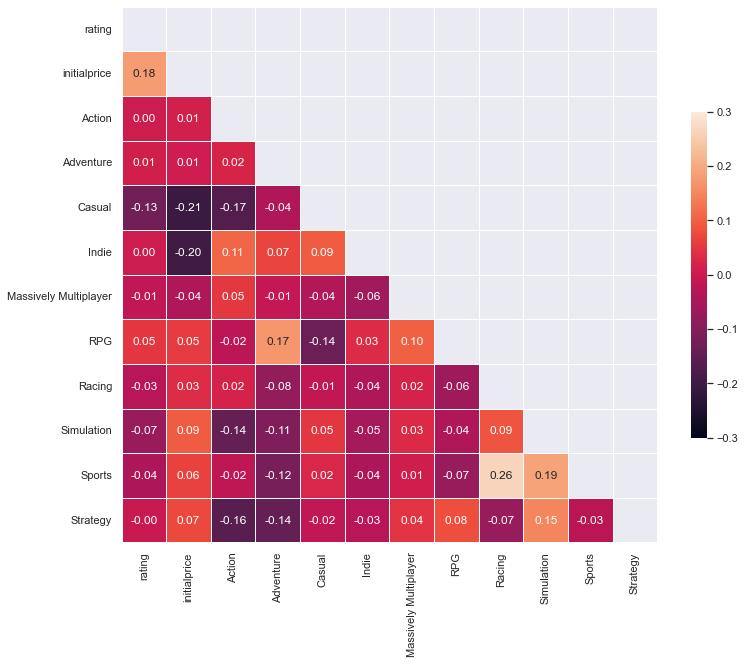

In [468]:
# Compute the correlation matrix
genres_corr = genres_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(genres_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(genres_corr, mask=mask, cmap="rocket", vmin = -0.3, vmax = 0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt = ".2f")

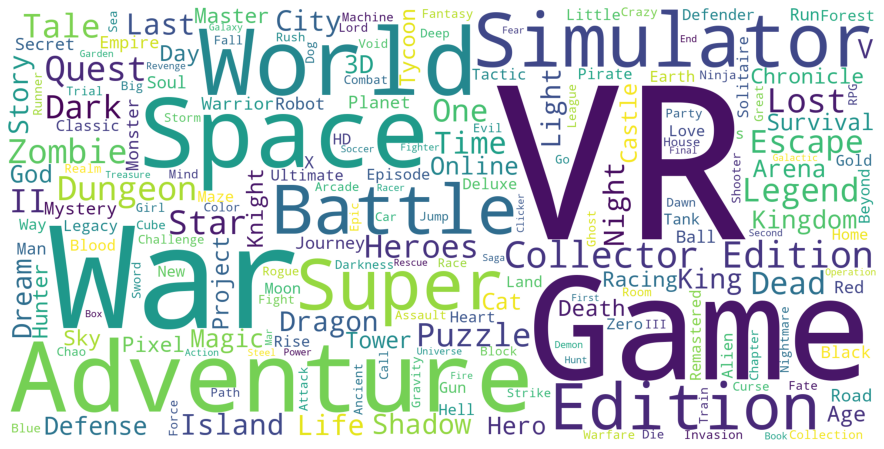

In [460]:
# fancy word clouds to see commonly used words in game titles and descriptions

from wordcloud import WordCloud, STOPWORDS

name_corpus = ' '.join(data["name"])
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 1000, width = 2000).generate(name_corpus)
plt.figure(figsize=(16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

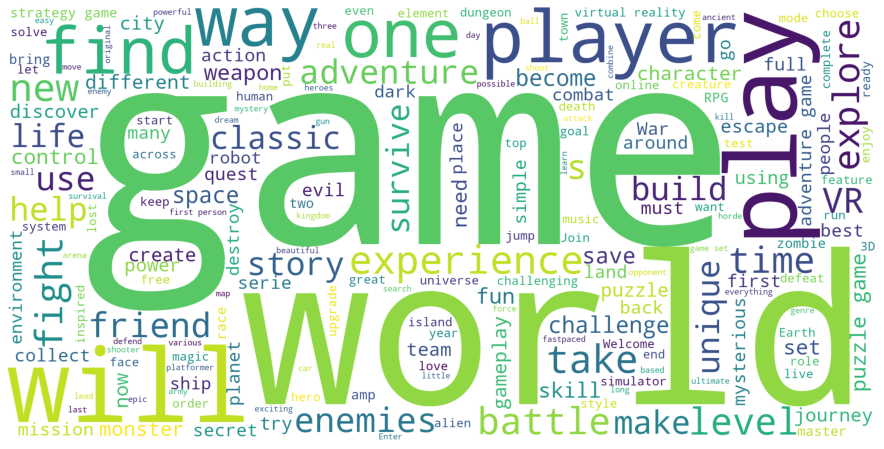

In [461]:
# TODO: clean the text data better
import re
import string

description_corpus = ' '.join(data["short_description"])
words = description_corpus.split()
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
description_corpus = ' '.join(stripped)

description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 1000, width = 2000).generate(description_corpus)
plt.figure(figsize=(16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()